In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from tabulate import tabulate as tab
import warnings
import generate_synthetic_data as gsd


## Read Data

In [2]:
# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
data, labels = gsd.read_data_txt(IDs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# data, labels = gsd.read_data_txt(IDs = [1])

case    total    gammas    neutrons    ratio (g/n)    Amax total    Amax gammas    Amax neutrons
------  -------  --------  ----------  -------------  ------------  -------------  ---------------
case1   623142   511540    111602      4.6            1.6763        1.6763         0.7248
case2   452712   353630    99082       3.6            1.6847        1.6847         0.7123
case3   368758   276193    92565       3.0            1.6799        1.6799         1.3376
case4   318295   229068    89227       2.6            1.7077        1.7077         0.8486
case5   286039   199074    86965       2.3            1.6881        1.6881         0.4909
case6   265001   178813    86188       2.1            1.6737        1.6737         1.0577
case7   247812   163450    84362       1.9            1.6787        1.6787         0.6179
case8   239239   154336    84903       1.8            1.6719        1.6719         0.8129
case9   230631   146351    84280       1.7            1.6673        1.6673         0

### Merge all cases together

In [3]:
data_merged, labels_merged, neutrons_merged, gammas_merged = gsd.merge_cases_together(data, labels)

## Get The Templates

We sorted and binned them by amplitude in ten bins (bin width 0.045 V), ranging from 0.05 to 0.5 V. 

Pulses in each energy bin were averaged to obtain a pulse template. 

Through this method, we generated ten pulse templates with discrete amplitudes from 0.05 V to 0.5 V for both neutron and gamma-ray pulse types.

In [4]:
bin_edges = np.linspace(0.05, 0.5, 11) # 11 edges → 10 bins
# bin_edges = np.linspace(0.05, 0.5, 6) # 6 edges → 5 bins

In [5]:
print('neutrons')
bin_centers_n, templates_n, _ = gsd.make_templates(neutrons_merged, bin_edges, align = False)
print('\ngammas')
bin_centers_g, templates_g, _ = gsd.make_templates(gammas_merged, bin_edges, align = False)

neutrons
 sample shape (900092, 296)
 peak amplitude (min, max) -0.0033 1.3376
 average peak amplitude 0.0013619347255764004
 counts per bin: [71347 26978 11126  6315  3764  1464   914   457    95    25]

gammas
 sample shape (2313893, 296)
 peak amplitude (min, max) -0.014 1.7077
 average peak amplitude 0.0016248415398649315
 counts per bin: [502506  51560  35116  22848  15713  12296  10030   7494   6379   6121]


In [6]:
print('Selection')
data_clean, labels_clean = gsd.pulse_selection_tight(data_merged, labels_merged)
neutrons_clean = data_clean[labels_clean == 1]
gammas_clean = data_clean[labels_clean == 0]
print('\nneutrons clean')
bin_centers_n_clean, templates_n_clean, templates_n_clean_norm = gsd.make_templates(neutrons_clean, bin_edges, align = False)
print('gammas clean')
bin_centers_g_clean, templates_g_clean, templates_g_clean_norm = gsd.make_templates(gammas_clean, bin_edges, align = False)

Selection
                    count    percentage of total [%]
------------------  -------  -------------------------
Ntot                3213985
count_minThreshold  2385711  74.2
count_maxThreshold  0        0.0
count_switch        0        0.0
count_beforePulses  12081    0.4
count_afterPulses   14005    0.4
---                 ---      ---
Nsel                802186   25.0

neutrons clean
 sample shape (107014, 296)
 peak amplitude (min, max) -0.0023 1.3376
 average peak amplitude 0.005321013539400496
 counts per bin: [56952 26196 10944  6248  3722  1438   907   456    87    21]
gammas clean
 sample shape (695172, 296)
 peak amplitude (min, max) -0.0029 1.7077
 average peak amplitude 0.004025050554764526
 counts per bin: [502274  51528  35105  22845  15709  12289  10027   7492   6378   6119]


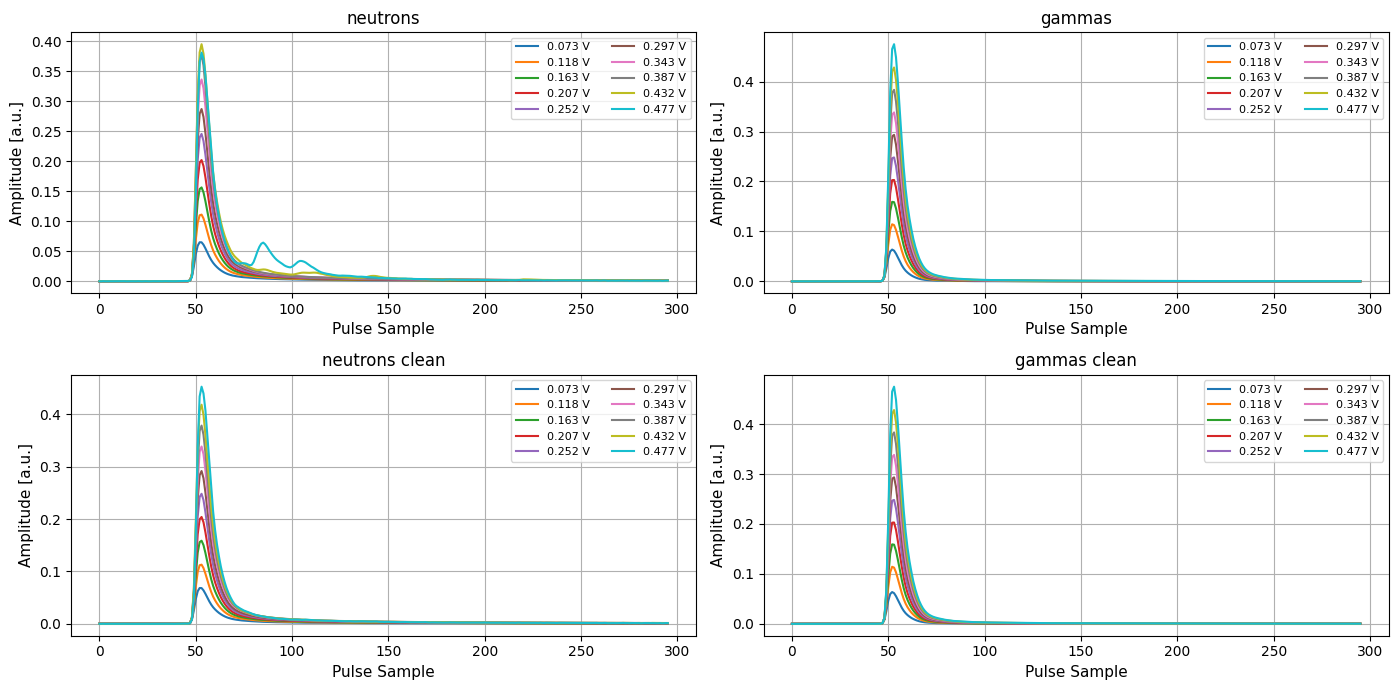

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

axs = axs.flatten()
for i in range(10):
    axs[0].plot(templates_n[i], label=f"{bin_centers_n[i]:.3f} V")
    axs[1].plot(templates_g[i], label=f"{bin_centers_g[i]:.3f} V")
    axs[2].plot(templates_n_clean[i], label=f"{bin_centers_n_clean[i]:.3f} V")
    axs[3].plot(templates_g_clean[i], label=f"{bin_centers_g_clean[i]:.3f} V")

for i in range(0, 4):
    axs[i].set_xlabel("Pulse Sample", fontsize=11)
    axs[i].set_ylabel("Amplitude [a.u.]", fontsize=11)
    axs[i].legend(ncol=2, fontsize=8)
    axs[i].grid()
    # axs[i].set_xlim(0, 120)
    # axs[i].set_ylim(0, 1.05)
axs[0].set_title(f'neutrons')
axs[1].set_title(f'gammas')
axs[2].set_title(f'neutrons clean')
axs[3].set_title(f'gammas clean')
plt.tight_layout()
plt.show()




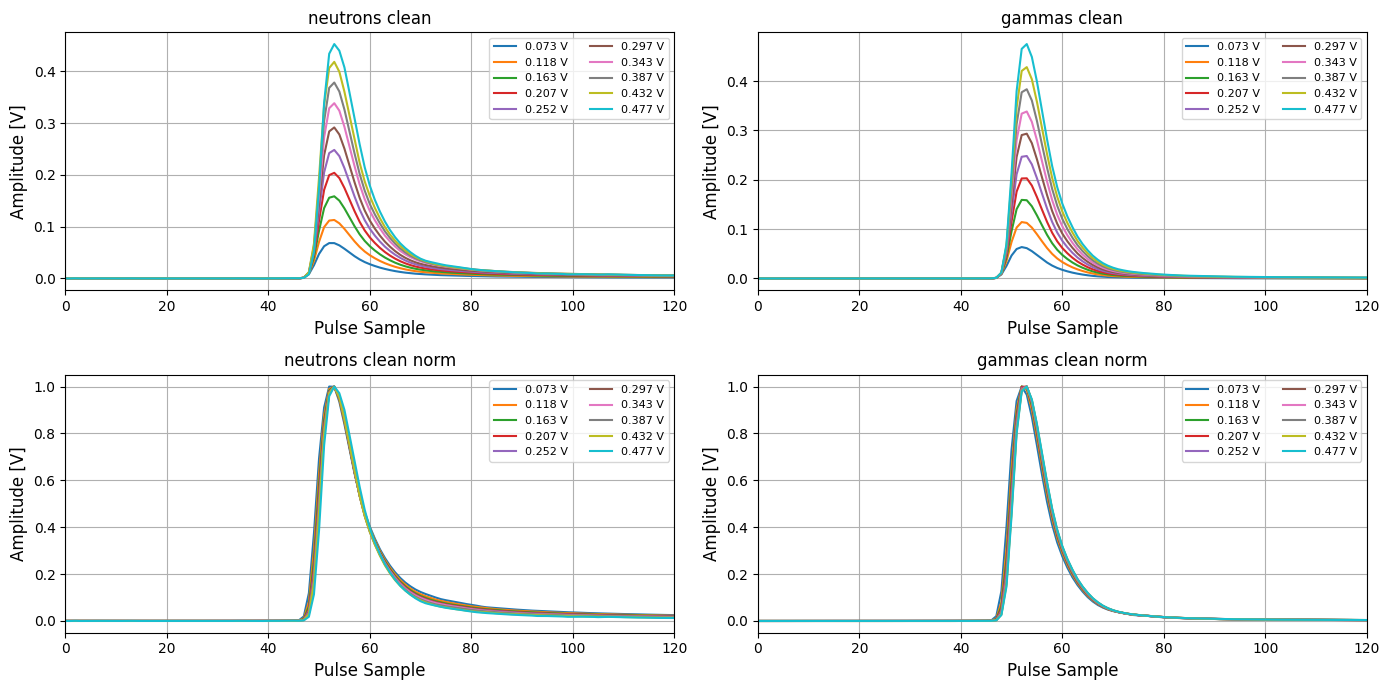

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

axs = axs.flatten()
axs[0].set_title(f'neutrons clean')
axs[1].set_title(f'gammas clean')
axs[2].set_title(f'neutrons clean norm')
axs[3].set_title(f'gammas clean norm')
for i in range(10):
    axs[0].plot(templates_n_clean[i], label=f"{bin_centers_n[i]:.3f} V")
    axs[1].plot(templates_g_clean[i], label=f"{bin_centers_g[i]:.3f} V")
    axs[2].plot(templates_n_clean_norm[i], label=f"{bin_centers_n[i]:.3f} V")
    axs[3].plot(templates_g_clean_norm[i], label=f"{bin_centers_g[i]:.3f} V")

for i in range(0, 4):
    axs[i].set_xlabel("Pulse Sample", fontsize=12)
    axs[i].set_ylabel("Amplitude [V]", fontsize=12)
    axs[i].legend(ncol=2, fontsize=8)
    axs[i].grid()
    axs[i].set_xlim(0, 120)
    # axs[i].set_ylim(0, 0.5)
plt.tight_layout()
plt.show()

## Align Templates

In [9]:
templates_n_clean_norm = gsd.align_templates(templates_n_clean_norm, target_idx=60)
templates_g_clean_norm = gsd.align_templates(templates_g_clean_norm, target_idx=60)

templates_n_clean = gsd.align_templates(templates_n_clean, target_idx=60)
templates_g_clean = gsd.align_templates(templates_g_clean, target_idx=60)

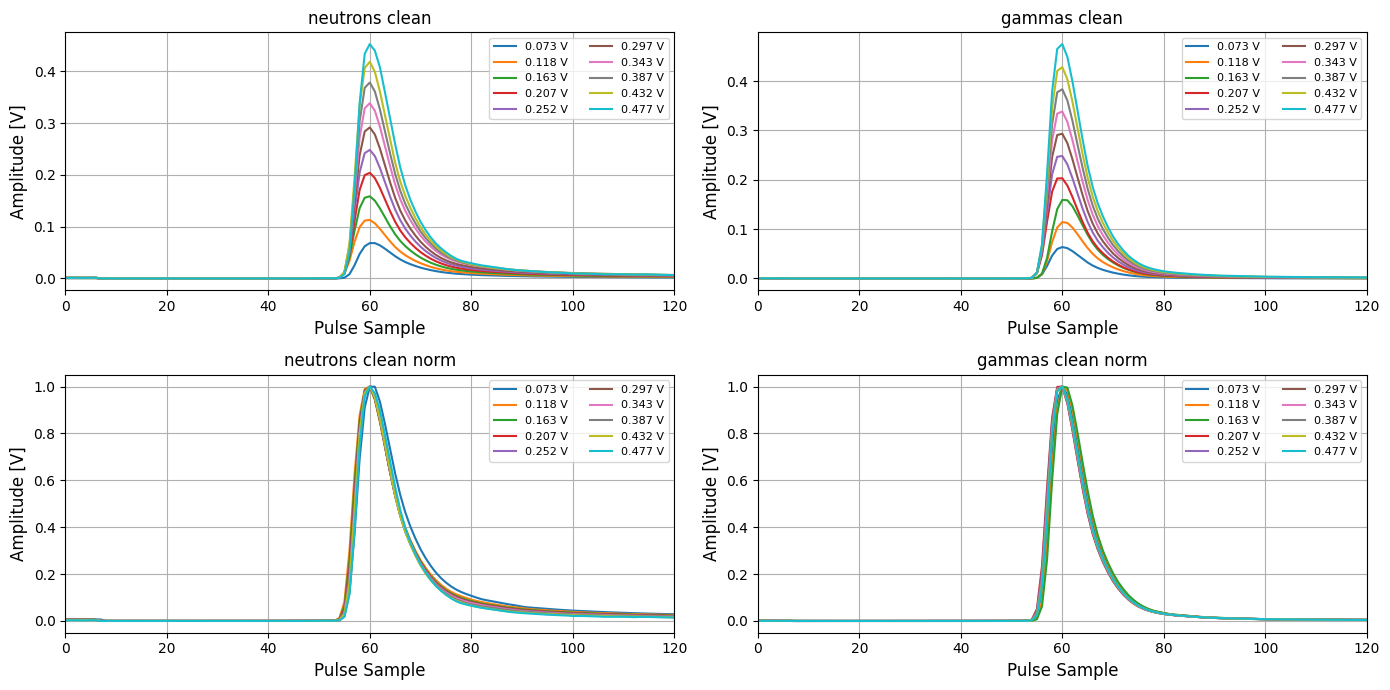

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

axs = axs.flatten()
axs[0].set_title(f'neutrons clean')
axs[1].set_title(f'gammas clean')
axs[2].set_title(f'neutrons clean norm')
axs[3].set_title(f'gammas clean norm')
for i in range(10):
    axs[0].plot(templates_n_clean[i], label=f"{bin_centers_n[i]:.3f} V")
    axs[1].plot(templates_g_clean[i], label=f"{bin_centers_g[i]:.3f} V")
    axs[2].plot(templates_n_clean_norm[i], label=f"{bin_centers_n[i]:.3f} V")
    axs[3].plot(templates_g_clean_norm[i], label=f"{bin_centers_g[i]:.3f} V")

for i in range(0, 4):
    axs[i].set_xlabel("Pulse Sample", fontsize=12)
    axs[i].set_ylabel("Amplitude [V]", fontsize=12)
    axs[i].legend(ncol=2, fontsize=8)
    axs[i].grid()
    axs[i].set_xlim(0, 120)
    # axs[i].set_ylim(0, 0.5)
plt.tight_layout()
plt.show()

# Interpolation

In [11]:
templates_neutrons_norm = templates_n_clean_norm
templates_gammas_norm = templates_g_clean_norm
print('n', templates_neutrons_norm.shape)
print('g', templates_gammas_norm.shape)
bin_centers = bin_centers_n_clean

n (10, 296)
g (10, 296)


### check

/Users/emiliebertholet/Desktop/DataAnalysis/PSD_GMVA_paper/synthetic_data/generate_synthetic_data.py:227: UserWarning: A=0.020 below template range [0.073, 0.477] — clamping to lowest template
  warnings.warn(


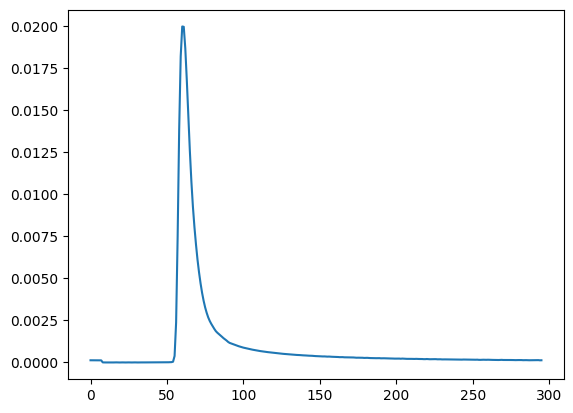

In [12]:
p = gsd.generate_synthetic_pulse(0.02, templates_neutrons_norm, bin_centers, 0.0, Normalize=False)

plt.plot(p)
plt.show()

/Users/emiliebertholet/Desktop/DataAnalysis/PSD_GMVA_paper/synthetic_data/generate_synthetic_data.py:227: UserWarning: A=0.010 below template range [0.073, 0.477] — clamping to lowest template
  warnings.warn(
/Users/emiliebertholet/Desktop/DataAnalysis/PSD_GMVA_paper/synthetic_data/generate_synthetic_data.py:227: UserWarning: A=0.050 below template range [0.073, 0.477] — clamping to lowest template
  warnings.warn(
/Users/emiliebertholet/Desktop/DataAnalysis/PSD_GMVA_paper/synthetic_data/generate_synthetic_data.py:234: UserWarning: A=0.500 above template range [0.073, 0.477] — clamping to highest template
  warnings.warn(
/Users/emiliebertholet/Desktop/DataAnalysis/PSD_GMVA_paper/synthetic_data/generate_synthetic_data.py:234: UserWarning: A=0.700 above template range [0.073, 0.477] — clamping to highest template
  warnings.warn(
/Users/emiliebertholet/Desktop/DataAnalysis/PSD_GMVA_paper/synthetic_data/generate_synthetic_data.py:234: UserWarning: A=1.000 above template range [0.073, 0.

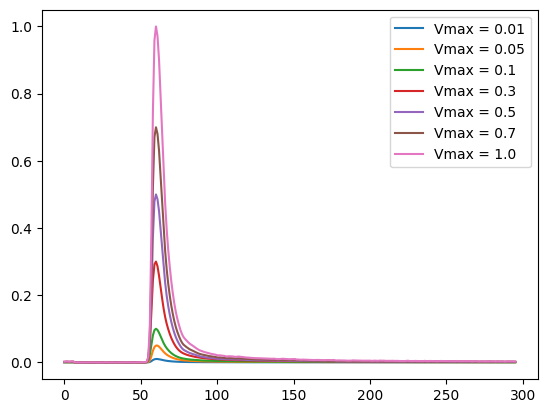

In [13]:
for A in [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1.0]:
    p = gsd.generate_synthetic_pulse(A, templates_neutrons_norm, bin_centers, 0.0, Normalize=False)
    plt.plot(p, label=f'Vmax = {A}')
plt.legend()
plt.show()

### generate small sample

Clamped fraction: 0.0
Clamped fraction: 0.0


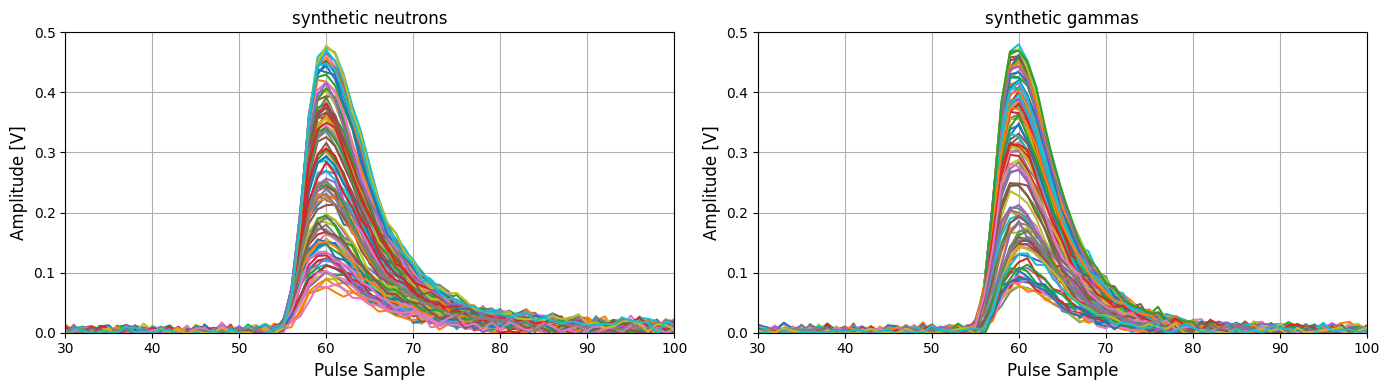

In [14]:
noise_sigma = 0.005
Npulses = 100

neutrons_synth, _ = gsd.generate_sample(templates = templates_neutrons_norm, 
                                 bin_centers =  bin_centers, 
                                 Npulses = Npulses, 
                                 sigma = noise_sigma,
                                 Normalize=False
                                 )

gammas_synth, _ = gsd.generate_sample(templates = templates_gammas_norm, 
                                 bin_centers =  bin_centers, 
                                 Npulses = Npulses, 
                                 sigma = noise_sigma,
                                 Normalize=False
                                 )

if Npulses <=100:
    fig, axs = plt.subplots(1, 2, figsize=(14, 4))
    for n in neutrons_synth:
        axs[0].plot(n)
        axs[0].set_title('synthetic neutrons')

    for g in gammas_synth:
        axs[1].plot(g)
        axs[1].set_title('synthetic gammas')

    for i in range(0, 2):
        axs[i].set_xlabel("Pulse Sample", fontsize=12)
        axs[i].set_ylabel("Amplitude [V]", fontsize=12)
        # axs[i].legend(ncol=2, fontsize=8)
        axs[i].grid()
        axs[i].set_xlim(30, 100)
        axs[i].set_ylim(0, 0.5)
    plt.tight_layout()
    plt.show()

Clamped fraction: 0.0


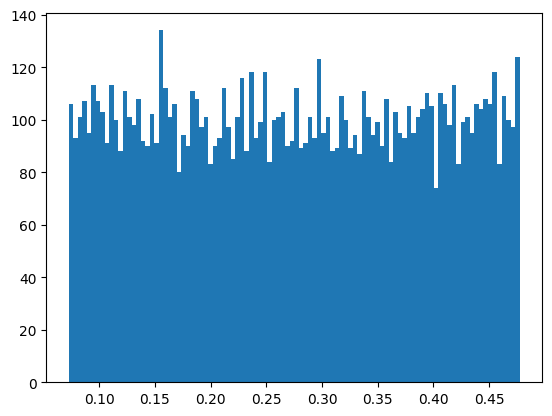

In [15]:
Npulses = 10000
neutrons_synth, amps = gsd.generate_sample(templates = templates_neutrons_norm, 
                                 bin_centers =  bin_centers, 
                                 Npulses = Npulses, 
                                 sigma = noise_sigma,
                                 Normalize=False
                                 )
plt.hist(amps, bins=100);

## PSD on synthetic data

Improve / check

- what happens of the end (start) point is after (before) the trigger window

In [16]:
# sigma_noise = 0.001
# sigma_noise = 0.0025
sigma_noise = 0.005
# sigma_noise = 0.01

min_voltage = 0.05
max_voltage = 0.5 ## cannot go too high because PSD gets distorted

Npulses = 100000 # 100000 is ok, 500000 takes 10s
print('NEUTRONS')
neutrons_synth, _ = gsd.generate_sample(templates = templates_neutrons_norm, 
                                 bin_centers =  bin_centers, 
                                 Npulses = Npulses, 
                                 sigma = sigma_noise,
                                 A_min=min_voltage, 
                                 A_max=max_voltage,
                                 Normalize=False) # if True PSD doesn't work
print('GAMMAS')
gammas_synth, _ = gsd.generate_sample(templates = templates_gammas_norm, 
                                 bin_centers =  bin_centers, 
                                 Npulses = Npulses, 
                                 sigma = sigma_noise,
                                 A_min=min_voltage, 
                                 A_max=max_voltage,
                                 Normalize=False) # if True PSD doesn't work
data_synth = np.concatenate((neutrons_synth, gammas_synth), axis=0)
data_synth.shape

NEUTRONS


/Users/emiliebertholet/Desktop/DataAnalysis/PSD_GMVA_paper/synthetic_data/generate_synthetic_data.py:227: UserWarning: A=0.069 below template range [0.073, 0.477] — clamping to lowest template
  warnings.warn(
/Users/emiliebertholet/Desktop/DataAnalysis/PSD_GMVA_paper/synthetic_data/generate_synthetic_data.py:227: UserWarning: A=0.071 below template range [0.073, 0.477] — clamping to lowest template
  warnings.warn(
/Users/emiliebertholet/Desktop/DataAnalysis/PSD_GMVA_paper/synthetic_data/generate_synthetic_data.py:234: UserWarning: A=0.493 above template range [0.073, 0.477] — clamping to highest template
  warnings.warn(
/Users/emiliebertholet/Desktop/DataAnalysis/PSD_GMVA_paper/synthetic_data/generate_synthetic_data.py:234: UserWarning: A=0.480 above template range [0.073, 0.477] — clamping to highest template
  warnings.warn(
/Users/emiliebertholet/Desktop/DataAnalysis/PSD_GMVA_paper/synthetic_data/generate_synthetic_data.py:234: UserWarning: A=0.485 above template range [0.073, 0.

Clamped fraction: 0.04919
GAMMAS
Clamped fraction: 0.05099


(200000, 296)

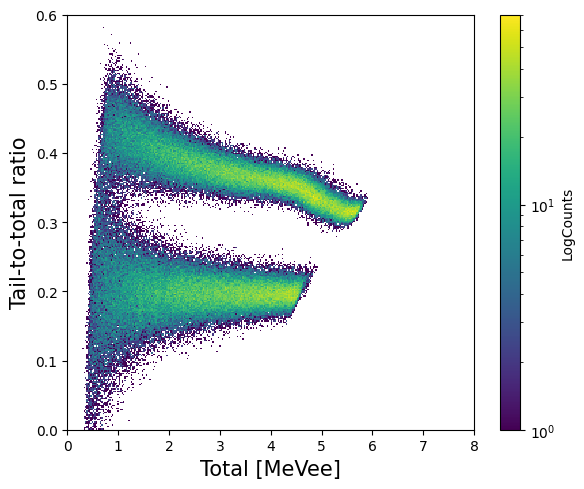

In [17]:

totals,ttr = gsd.get_psd_integrals(data_synth)
plt.figure(figsize=(6, 5))

# no cuts
plt.hist2d(
    totals,
    ttr,
    bins=[300, 300],
    range=[[0, 8], [0, 0.6]],
    norm=LogNorm(),
    cmap="viridis"
)

plt.colorbar(label="LogCounts")
plt.xlabel('Total [MeVee]', fontsize = 15)
plt.ylabel("Tail-to-total ratio", fontsize = 15)
plt.tight_layout()
plt.show()

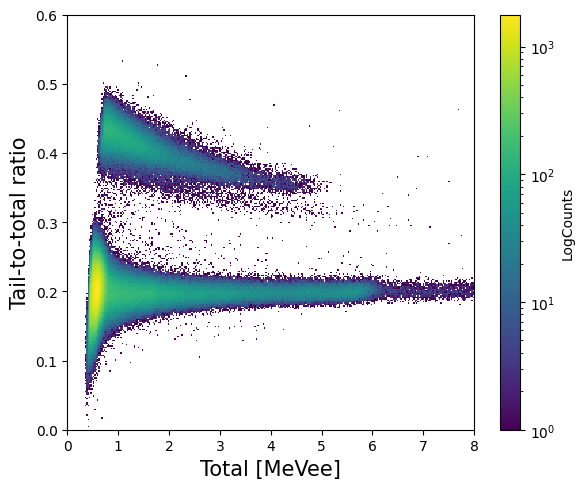

In [18]:

totals,ttr = gsd.get_psd_integrals(data_clean)
plt.figure(figsize=(6, 5))

# no cuts
plt.hist2d(
    totals,
    ttr,
    bins=[300, 300],
    range=[[0, 8], [0, 0.6]],
    norm=LogNorm(),
    cmap="viridis"
)

plt.colorbar(label="LogCounts")
plt.xlabel('Total [MeVee]', fontsize = 15)
plt.ylabel("Tail-to-total ratio", fontsize = 15)
plt.tight_layout()
plt.show()

# Debugging

In [19]:
templates_neutrons = templates_n_clean
templates_gammas = templates_g_clean
print('n', templates_neutrons.shape)
print('g', templates_gammas.shape)
bin_centers = bin_centers_n_clean

n (10, 296)
g (10, 296)
